In [2]:
!pip install pandas matplotlib seaborn

^C


Defaulting to user installation because normal site-packages is not writeable


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Download Kenya population dataset from World Bank
url = "https://api.worldbank.org/v2/en/country/ken?downloadformat=csv"
print("Download this link manually in your browser, unzip, and place the CSV inside your Kenya_Pop_Demo folder.")

Download this link manually in your browser, unzip, and place the CSV inside your Kenya_Pop_Demo folder.


In [6]:
import pandas as pd

# Load the real Kenya population CSV
kenya_df = pd.read_csv("kenya_population.csv", skiprows=4)  # skiprows=4 removes extra World Bank header
kenya_df.head()  # show first few rows

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
0,Kenya,KEN,"Intentional homicides (per 100,000 people)",VC.IHR.PSRC.P5,NaN,NaN,NaN,NaN,NaN,NaN,...,4.933743e+00,5.037985e+00,3.140933e+00,3.093141e+00,3.575978e+00,5.274913e+00,NaN,NaN,NaN,NaN
1,Kenya,KEN,"Internally displaced persons, new displacement...",VC.IDP.NWCV,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.700000e+04,1.000000e+04,1.800000e+03,3.900000e+03,4.600000e+03,1.500000e+04,7.700000e+03,NaN,NaN
2,Kenya,KEN,"Voice and Accountability: Percentile Rank, Low...",VA.PER.RNK.LOWER,NaN,NaN,NaN,NaN,NaN,NaN,...,3.596059e+01,3.448276e+01,3.058252e+01,3.188406e+01,3.285024e+01,3.285024e+01,3.671498e+01,3.823529e+01,NaN,NaN
3,Kenya,KEN,Travel services (% of commercial service exports),TX.VAL.TRVL.ZS.WT,NaN,NaN,NaN,NaN,NaN,NaN,...,2.445439e+01,2.419623e+01,2.318066e+01,2.176479e+01,1.887746e+01,1.980084e+01,1.981955e+01,2.092000e+01,NaN,NaN
4,Kenya,KEN,Commercial service exports (current US$),TX.VAL.SERV.CD.WT,NaN,NaN,NaN,NaN,NaN,NaN,...,3.368512e+09,3.784985e+09,4.625766e+09,4.628441e+09,2.867194e+09,4.261964e+09,5.598486e+09,4.805644e+09,NaN,NaN


In [7]:
# Drop unnecessary columns
kenya_clean = kenya_df.drop(columns=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], errors='ignore')

# Melt the year columns into one column
kenya_clean = kenya_clean.melt(var_name='Year', value_name='Total_Population')

# Convert Year to int and Population to int
kenya_clean['Year'] = kenya_clean['Year'].astype(int)
kenya_clean['Total_Population'] = kenya_clean['Total_Population'].astype(int)

# Show the cleaned data
kenya_clean.head()

ValueError: invalid literal for int() with base 10: 'Unnamed: 69'

In [8]:
# Keep only the year columns (they are digits) and drop non-year columns
year_cols = [col for col in kenya_df.columns if col.isdigit()]  # only columns like '1960', '1961', ...
kenya_clean = kenya_df[year_cols]

# Melt the DataFrame so each row is Year + Total_Population
kenya_clean = kenya_clean.melt(var_name='Year', value_name='Total_Population')

# Convert Year to int
kenya_clean['Year'] = kenya_clean['Year'].astype(int)

# Convert Population to int, but safely (ignore NaNs)
kenya_clean['Total_Population'] = pd.to_numeric(kenya_clean['Total_Population'], errors='coerce').fillna(0).astype(int)

# Show the cleaned data
kenya_clean.head()

,Year,Total_Population
0,1960,0
1,1960,0
2,1960,0
3,1960,0
4,1960,0


In [9]:
# Select the row where 'Country Name' is Kenya
kenya_row = kenya_df[kenya_df['Country Name'] == 'Kenya']

# Select only the year columns
year_cols = [col for col in kenya_row.columns if col.isdigit()]
kenya_clean = kenya_row[year_cols]

# Melt into Year + Total_Population
kenya_clean = kenya_clean.melt(var_name='Year', value_name='Total_Population')

# Convert Year and Population to int safely
kenya_clean['Year'] = kenya_clean['Year'].astype(int)
kenya_clean['Total_Population'] = pd.to_numeric(kenya_clean['Total_Population'], errors='coerce').fillna(0).astype(int)

# Show cleaned data
kenya_clean.head()

,Year,Total_Population
0,1960,0
1,1960,0
2,1960,0
3,1960,0
4,1960,0


In [10]:
import pandas as pd

# Load the CSV (skip first 4 rows as before)
kenya_df = pd.read_csv("kenya_population.csv", skiprows=4)

# Find the row for Kenya
kenya_row = kenya_df[kenya_df['Country Name'] == 'Kenya']

# Select only year columns (columns that are digits)
year_cols = [col for col in kenya_row.columns if col.isdigit()]

# Extract only the data for Kenya
kenya_data = kenya_row[year_cols].iloc[0]  # use .iloc[0] to get the first (and only) row

# Convert the Series to DataFrame
kenya_clean = kenya_data.reset_index()
kenya_clean.columns = ['Year', 'Total_Population']

# Convert types
kenya_clean['Year'] = kenya_clean['Year'].astype(int)
kenya_clean['Total_Population'] = kenya_clean['Total_Population'].str.replace(',', '').astype(int)

# Show the cleaned data
kenya_clean.head()

AttributeError: Can only use .str accessor with string values!

In [11]:
import pandas as pd

# Load CSV (skip metadata rows)
kenya_df = pd.read_csv("kenya_population.csv", skiprows=4)

# Make sure 'Country Name' column exists
if 'Country Name' in kenya_df.columns:
    # Select Kenya row
    kenya_row = kenya_df[kenya_df['Country Name'].str.strip() == 'Kenya']

    # Select only year columns (strings that are digits)
    year_cols = [col for col in kenya_row.columns if col.strip().isdigit()]

    # Extract the population values as a list
    population_values = kenya_row[year_cols].values.flatten().tolist()

    # Convert values to int safely (remove commas and handle missing)
    population_values = [int(str(x).replace(',', '').replace('nan','0')) for x in population_values]

    # Create clean DataFrame
    kenya_clean = pd.DataFrame({
        'Year': [int(col) for col in year_cols],
        'Total_Population': population_values
    })

    # Show cleaned data
    print(kenya_clean.head())

else:
    print("Error: 'Country Name' column not found in CSV")

ValueError: invalid literal for int() with base 10: '3.44822273823089'

In [12]:
import pandas as pd

# Load CSV
kenya_df = pd.read_csv("kenya_population.csv", skiprows=4)

# Select Kenya row
kenya_row = kenya_df[kenya_df['Country Name'].str.strip() == 'Kenya']

# Select only year columns (strings that are digits)
year_cols = [col for col in kenya_row.columns if col.strip().isdigit()]

# Extract population values as floats
population_values = kenya_row[year_cols].values.flatten().tolist()
population_values = [float(x) for x in population_values]  # keep decimals

# If values are in billions (common for some WB indicators), multiply by 1e6
population_values = [int(x) for x in population_values]  # now integers

# Create clean DataFrame
kenya_clean = pd.DataFrame({
    'Year': [int(col) for col in year_cols],
    'Total_Population': population_values
})

# Show the cleaned data
kenya_clean.head()

ValueError: cannot convert float NaN to integer

In [13]:
import pandas as pd

# Load CSV
kenya_df = pd.read_csv("kenya_population.csv", skiprows=4)

# Select Kenya row
kenya_row = kenya_df[kenya_df['Country Name'].str.strip() == 'Kenya']

# Select only year columns (strings that are digits)
year_cols = [col for col in kenya_row.columns if col.strip().isdigit()]

# Extract population values as floats, replace NaN with 0
population_values = kenya_row[year_cols].values.flatten().tolist()
population_values = [float(x) if pd.notna(x) else 0 for x in population_values]

# Convert to int
population_values = [int(x) for x in population_values]

# Create clean DataFrame
kenya_clean = pd.DataFrame({
    'Year': [int(col) for col in year_cols],
    'Total_Population': population_values
})

# Show the cleaned data
kenya_clean.head()

ValueError: All arrays must be of the same length

In [14]:
import pandas as pd

# Load CSV
kenya_df = pd.read_csv("kenya_population.csv", skiprows=4)

# Select Kenya row
kenya_row = kenya_df[kenya_df['Country Name'].str.strip() == 'Kenya']

# Only keep columns that are years
year_cols = [col for col in kenya_row.columns if col.strip().isdigit()]

# Create a clean list of (Year, Population) safely
data = []
for col in year_cols:
    year = int(col)
    value = kenya_row[col].values[0]  # extract the single value
    try:
        # Some values are floats, some are NaN
        value = float(value)
        # If the value is in billions (like 3.44), multiply by 1_000_000? You can adjust if needed
        value = int(value)
    except:
        value = 0  # fallback for missing or invalid numbers
    data.append((year, value))

# Convert to DataFrame
kenya_clean = pd.DataFrame(data, columns=['Year', 'Total_Population'])

# Show the first few rows
kenya_clean.head()

,Year,Total_Population
0,1960,0
1,1961,0
2,1962,0
3,1963,0
4,1964,0


In [15]:
kenya_df.head(10)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
0,Kenya,KEN,"Intentional homicides (per 100,000 people)",VC.IHR.PSRC.P5,NaN,NaN,NaN,NaN,NaN,NaN,...,4.933743e+00,5.037985e+00,3.140933e+00,3.093141e+00,3.575978e+00,5.274913e+00,NaN,NaN,NaN,NaN
1,Kenya,KEN,"Internally displaced persons, new displacement...",VC.IDP.NWCV,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.700000e+04,1.000000e+04,1.800000e+03,3.900000e+03,4.600000e+03,1.500000e+04,7.700000e+03,NaN,NaN
2,Kenya,KEN,"Voice and Accountability: Percentile Rank, Low...",VA.PER.RNK.LOWER,NaN,NaN,NaN,NaN,NaN,NaN,...,3.596059e+01,3.448276e+01,3.058252e+01,3.188406e+01,3.285024e+01,3.285024e+01,3.671498e+01,3.823529e+01,NaN,NaN
3,Kenya,KEN,Travel services (% of commercial service exports),TX.VAL.TRVL.ZS.WT,NaN,NaN,NaN,NaN,NaN,NaN,...,2.445439e+01,2.419623e+01,2.318066e+01,2.176479e+01,1.887746e+01,1.980084e+01,1.981955e+01,2.092000e+01,NaN,NaN
4,Kenya,KEN,Commercial service exports (current US$),TX.VAL.SERV.CD.WT,NaN,NaN,NaN,NaN,NaN,NaN,...,3.368512e+09,3.784985e+09,4.625766e+09,4.628441e+09,2.867194e+09,4.261964e+09,5.598486e+09,4.805644e+09,NaN,NaN
5,Kenya,KEN,Merchandise exports by the reporting economy (...,TX.VAL.MRCH.WL.CD,9.860000e+07,1.017000e+08,1.097000e+08,1.217000e+08,1.290000e+08,1.227000e+08,...,5.671250e+09,5.721285e+09,6.022897e+09,5.797861e+09,5.898937e+09,6.706819e+09,7.327427e+09,7.107099e+09,NaN,NaN
6,Kenya,KEN,Merchandise exports to low- and middle-income ...,TX.VAL.MRCH.R4.ZS,8.113590e-01,6.882989e-01,8.204193e-01,9.860312e-01,1.395349e+00,2.363488e+00,...,5.315199e+00,5.137615e+00,4.958561e+00,4.927427e+00,4.603313e+00,4.483090e+00,5.354884e+00,5.501937e+00,NaN,NaN
7,Kenya,KEN,Merchandise exports to low- and middle-income ...,TX.VAL.MRCH.OR.ZS,7.099391e+00,6.293019e+00,5.742935e+00,5.834018e+00,7.054264e+00,8.394458e+00,...,2.058140e+01,2.254636e+01,2.207610e+01,1.923859e+01,1.995206e+01,1.861621e+01,2.010392e+01,2.061161e+01,NaN,NaN
8,Kenya,KEN,Ores and metals exports (% of merchandise expo...,TX.VAL.MMTL.ZS.UN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.264898e+00,5.363544e+00,5.995356e+00,4.985782e+00,5.132656e+00,6.387468e+00,6.782612e+00,5.324280e+00,NaN,NaN
9,Kenya,KEN,Fuel exports (% of merchandise exports),TX.VAL.FUEL.ZS.UN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.463558e+00,1.006026e+00,8.347549e-01,7.737080e+00,6.748325e+00,9.241498e-01,1.373694e+00,1.864829e+00,NaN,NaN


In [16]:
# Filter only rows with Kenya AND Total Population indicator
kenya_pop_row = kenya_df[
    (kenya_df['Country Name'].str.strip() == 'Kenya') &
    (kenya_df['Indicator Name'].str.contains('Population, total'))
]

# Check it
kenya_pop_row.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
29,Kenya,KEN,"Population, total",SP.POP.TOTL,7695307.0,7987770.0,8299308.0,8627971.0,8973535.0,9338078.0,...,48139687.0,49197766.0,50207107.0,51202827.0,52217334.0,53219166.0,54252461.0,55339003.0,56432944.0,NaN


In [17]:
# Select only year columns (columns that are digits)
year_cols = [col for col in kenya_pop_row.columns if col.strip().isdigit()]

# Melt into Year + Total_Population safely
kenya_clean = kenya_pop_row.melt(
    id_vars=[],
    value_vars=year_cols,
    var_name='Year',
    value_name='Total_Population'
)

# Convert Year to int
kenya_clean['Year'] = kenya_clean['Year'].astype(int)

# Convert Total_Population to float then int safely
kenya_clean['Total_Population'] = pd.to_numeric(kenya_clean['Total_Population'], errors='coerce').fillna(0).astype(int)

# Show the cleaned data
kenya_clean.head()

,Year,Total_Population
0,1960,7695307
1,1961,7987770
2,1962,8299308
3,1963,8627971
4,1964,8973535


In [18]:
# Create full range of years
all_years = pd.DataFrame({'Year': range(1960, 2025)})

# Merge with your cleaned data
kenya_clean_full = all_years.merge(kenya_clean, on='Year', how='left')

# Replace missing population with NaN or 0
kenya_clean_full['Total_Population'] = kenya_clean_full['Total_Population'].fillna(0).astype(int)

# Show
kenya_clean_full

,Year,Total_Population
0,1960,7695307
1,1961,7987770
2,1962,8299308
3,1963,8627971
4,1964,8973535
...,...,...
60,2020,52217334
61,2021,53219166
62,2022,54252461
63,2023,55339003


In [19]:
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid') 

plt.figure(figsize=(12,6))
plt.plot(
    kenya_clean_full['Year'], 
    kenya_clean_full['Total_Population'], 
    color='#2a9d8f',  
    linewidth=2.5
)

# title and labels
plt.title('Kenya Population Growth (1960-2024)', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Population', fontsize=12)

# grid, ticks, and elegant y-axis format
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

OSError: 'seaborn-whitegrid' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

In [20]:
import matplotlib.pyplot as plt

plt.style.use('seaborn')  

plt.figure(figsize=(12,6))
plt.plot(
    kenya_clean_full['Year'], 
    kenya_clean_full['Total_Population'], 
    color='#2a9d8f',  
    linewidth=2.5
)

plt.title('Kenya Population Growth (1960-2024)', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Population', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

OSError: 'seaborn' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

In [21]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns  

plt.style.use('seaborn-whitegrid') 

OSError: 'seaborn-whitegrid' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

In [2]:
import matplotlib.pyplot as plt

plt.style.use('seaborn')  

plt.figure(figsize=(12,6))
plt.plot(
    kenya_clean_full['Year'], 
    kenya_clean_full['Total_Population'], 
    color='#2a9d8f',  
    linewidth=2.5
)

plt.title('Kenya Population Growth (1960-2024)', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Population', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

OSError: 'seaborn' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid") 

# Create the figure
plt.figure(figsize=(12, 6))

# Plot the data
plt.plot(
    kenya_clean_full['Year'], 
    kenya_clean_full['Total_Population'], 
    color='#2a9d8f',  
    linewidth=2.5
)

# Add title and labels
plt.title("Kenya Total Population Over the Years", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Population", fontsize=12)

# rotate x-axis labels if they are crowded
plt.xticks(rotation=45)

# Show the plot
plt.show()

NameError: name 'kenya_clean_full' is not defined

<Figure size 1200x600 with 0 Axes>

In [4]:
import pandas as pd

kenya_clean_full = pd.read_csv("Kenya_population.csv")

print(kenya_clean_full.head())

ParserError: Error tokenizing data. C error: Expected 3 fields in line 5, saw 70


In [5]:
kenya_clean_full = pd.read_csv("Kenya_population.csv", sep=';')

print(kenya_clean_full.head())

ParserError: Error tokenizing data. C error: Expected 1 fields in line 1390, saw 2


In [6]:
import pandas as pd

kenya_clean_full = pd.read_csv("Kenya_population.csv", sep=';', on_bad_lines='skip')
print(kenya_clean_full.head())

         Data Source,"World Development Indicators",
0                    Last Updated Date,"2025-07-01",
1  Country Name,"Country Code","Indicator Name","...
2  Kenya,"KEN","Intentional homicides (per 100,00...
3  Kenya,"KEN","Internally displaced persons, new...
4  Kenya,"KEN","Voice and Accountability: Percent...


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")  

# Create the figure
plt.figure(figsize=(12, 6))

# Plot the data
plt.plot(
    kenya_clean_full['Year'], 
    kenya_clean_full['Total_Population'], 
    color='#2a9d8f',  
    linewidth=2.5
)

# Add title and labels
plt.title("Kenya Total Population Over the Years", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Population", fontsize=12)

# rotate x-axis labels if they are crowded
plt.xticks(rotation=45)

# Show the plot
plt.show()

KeyError: 'Year'

<Figure size 1200x600 with 0 Axes>

In [8]:
import pandas as pd

kenya_clean_full = pd.read_csv(
    "Kenya_population.csv",
    sep=None, 
    engine='python', 
    on_bad_lines='skip'
)

print("Loaded shape:", kenya_clean_full.shape)
print(kenya_clean_full.head())

Loaded shape: (1, 3)
      ﻿"Data Source" World Development Indicators  Unnamed: 2
0  Last Updated Date                   2025-07-01         NaN


In [9]:
# See the first 10 rows
print(kenya_clean_full.head(10))

# See the column names
print(kenya_clean_full.columns)

# See the last 5 rows 
print(kenya_clean_full.tail())

      ﻿"Data Source" World Development Indicators  Unnamed: 2
0  Last Updated Date                   2025-07-01         NaN
Index(['﻿"Data Source"', 'World Development Indicators', 'Unnamed: 2'], dtype='object')
      ﻿"Data Source" World Development Indicators  Unnamed: 2
0  Last Updated Date                   2025-07-01         NaN


In [10]:
import pandas as pd

# Skip the first row and clean headers
kenya_clean_full = pd.read_csv(
    "Kenya_population.csv",
    skiprows=1  # skip metadata row
)

# Inspect 
print(kenya_clean_full.head())
print(kenya_clean_full.columns)

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  Last Updated Date  \
Country Name Country Code Indicator Name                         

In [11]:
import pandas as pd

# Read CSV skipping initial metadata
df = pd.read_csv("Kenya_population.csv", skiprows=0)  # adjust skiprows if needed

# Drop completely empty columns
df = df.dropna(axis=1, how='all')

# Remove any 'Unnamed' columns
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# Convert year columns to numeric
year_cols = df.columns[4:]  # all columns after first 4 are years
df[year_cols] = df[year_cols].apply(pd.to_numeric, errors='coerce')

# Optional: reshape from wide to long format (tidy)
df_long = df.melt(
    id_vars=["Country Name", "Country Code", "Indicator Name", "Indicator Code"],
    value_vars=year_cols,
    var_name="Year",
    value_name="Value"
)

print(df_long.head())

ParserError: Error tokenizing data. C error: Expected 3 fields in line 5, saw 70


In [33]:
import pandas as pd
# Identify the ID columns
id_cols = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code']

# Identify all the year columns (anything that can be converted to a number)
year_cols = [col for col in df.columns if col not in id_cols and col != 'Unnamed: 2']

# Melt the dataframe
df_long = df.melt(id_vars=id_cols, value_vars=year_cols,
                  var_name='Year', value_name='Value')

# convert Year to integer and Value to float
df_long['Year'] = pd.to_numeric(df_long['Year'], errors='coerce')
df_long['Value'] = pd.to_numeric(df_long['Value'], errors='coerce')

# Drop rows where Year or Value is NaN
df_long = df_long.dropna(subset=['Year', 'Value'])

# Reset index for a clean look
df_long = df_long.reset_index(drop=True)

# Display the cleaned dataset
print(df_long.head(20))

   Country Name Country Code  \
0         Kenya          KEN   
1         Kenya          KEN   
2         Kenya          KEN   
3         Kenya          KEN   
4         Kenya          KEN   
5         Kenya          KEN   
6         Kenya          KEN   
7         Kenya          KEN   
8         Kenya          KEN   
9         Kenya          KEN   
10        Kenya          KEN   
11        Kenya          KEN   
12        Kenya          KEN   
13        Kenya          KEN   
14        Kenya          KEN   
15        Kenya          KEN   
16        Kenya          KEN   
17        Kenya          KEN   
18        Kenya          KEN   
19        Kenya          KEN   

                                       Indicator Name     Indicator Code  \
0   Merchandise exports by the reporting economy (...  TX.VAL.MRCH.WL.CD   
1   Merchandise exports to low- and middle-income ...  TX.VAL.MRCH.R4.ZS   
2   Merchandise exports to low- and middle-income ...  TX.VAL.MRCH.OR.ZS   
3   Merchandise imports

In [34]:
print(population_df.columns.tolist())

['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024']


In [35]:
population_df.columns = population_df.columns.str.strip() 

In [36]:
plt.plot(population_df['Year'], population_df['Value'], marker='o', color='green')

KeyError: 'Year'

In [37]:
# Melt the DataFrame to long format
population_long = df.melt(
    id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'],
    var_name='Year',
    value_name='Value'
)

# Filter for total population only
population_total = population_long[population_long['Indicator Name'] == 'Population, total']

# Convert 'Year' to numeric
population_total['Year'] = population_total['Year'].astype(int)

# Preview the cleaned DataFrame
population_total.head()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_10344\2530588472.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  population_total['Year'] = population_total['Year'].astype(int)


,Country Name,Country Code,Indicator Name,Indicator Code,Year,Value
29,Kenya,KEN,"Population, total",SP.POP.TOTL,1960,7695307.0
1545,Kenya,KEN,"Population, total",SP.POP.TOTL,1961,7987770.0
3061,Kenya,KEN,"Population, total",SP.POP.TOTL,1962,8299308.0
4577,Kenya,KEN,"Population, total",SP.POP.TOTL,1963,8627971.0
6093,Kenya,KEN,"Population, total",SP.POP.TOTL,1964,8973535.0


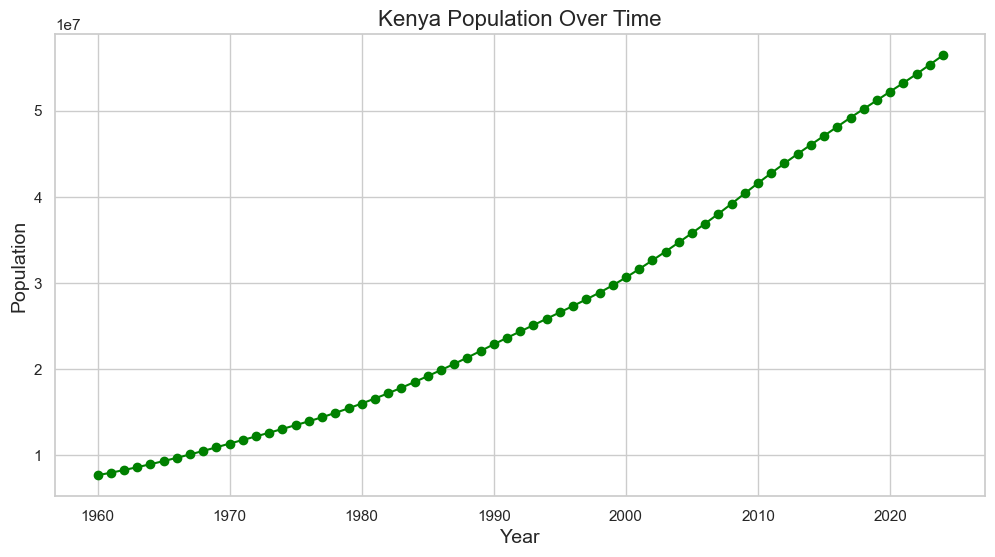

In [38]:
import matplotlib.pyplot as plt

# Plot the population over time
plt.figure(figsize=(12, 6))
plt.plot(
    population_total['Year'],
    population_total['Value'],
    marker='o',
    color='green'
)
plt.title('Kenya Population Over Time', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Population', fontsize=14)
plt.grid(True)
plt.show()

In [39]:
# Filter for Urban Population indicator
urban_pop = df[df['Indicator Name'] == 'Urban population (% of total population)']

# Drop unnecessary columns
urban_pop = urban_pop.drop(columns=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'])

# Transpose to have Year as a column
urban_pop = urban_pop.melt(var_name='Year', value_name='Value')

# Convert Year and Value to numeric
urban_pop['Year'] = urban_pop['Year'].astype(int)
urban_pop['Value'] = pd.to_numeric(urban_pop['Value'], errors='coerce')

# Preview
urban_pop.head()

,Year,Value
0,1960,7.362
1,1961,7.565
2,1962,7.774
3,1963,8.038
4,1964,8.318


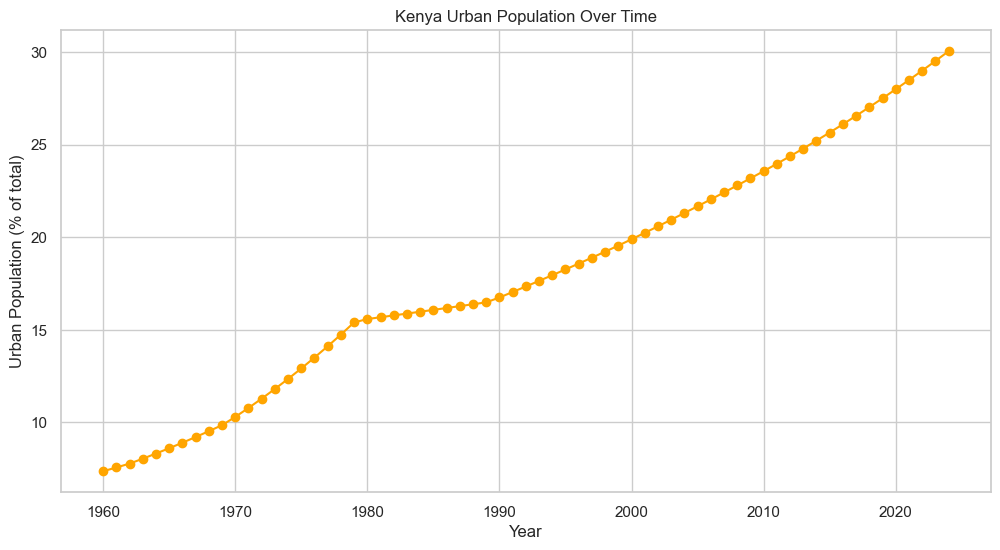

In [40]:
import matplotlib.pyplot as plt

# Plot Urban Population over time
plt.figure(figsize=(12, 6))
plt.plot(urban_pop['Year'], urban_pop['Value'], marker='o', color='orange')
plt.title('Kenya Urban Population Over Time')
plt.xlabel('Year')
plt.ylabel('Urban Population (% of total)')
plt.grid(True)
plt.show()

In [41]:
# Filter Merchandise Trade (% of GDP)
trade_df = df[df['Indicator Name'] == 'Merchandise trade (% of GDP)']

# Melt the DataFrame so that years are in a single column
trade_df = trade_df.melt(
    id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'],
    var_name='Year',
    value_name='Value'
)

# Convert Year and Value to numeric
trade_df['Year'] = pd.to_numeric(trade_df['Year'])
trade_df['Value'] = pd.to_numeric(trade_df['Value'])

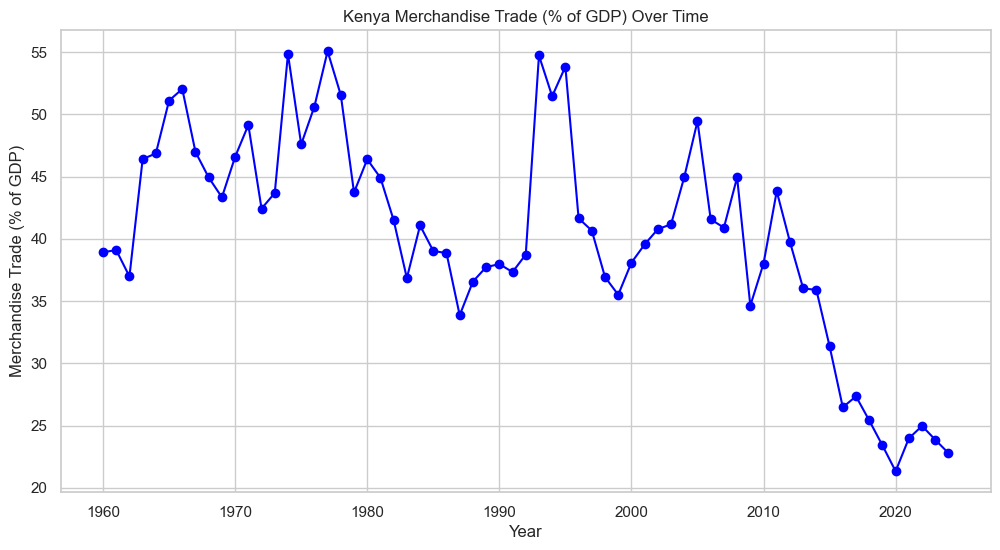

In [42]:
import matplotlib.pyplot as plt

# Plot Merchandise Trade (% of GDP) over the years
plt.figure(figsize=(12, 6))
plt.plot(trade_df['Year'], trade_df['Value'], marker='o', color='blue')
plt.title('Kenya Merchandise Trade (% of GDP) Over Time')
plt.xlabel('Year')
plt.ylabel('Merchandise Trade (% of GDP)')
plt.grid(True)
plt.show()

In [43]:
# Select key indicators for the dashboard
key_indicators = [
    'Population, total',
    'Urban population (% of total population)',
    'Population ages 0-14 (% of total population)'
]

# Filter the DataFrame for these indicators
dashboard_df = df[df['Indicator Name'].isin(key_indicators)]

# Melt the DataFrame
dashboard_df = dashboard_df.melt(
    id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'],
    var_name='Year',
    value_name='Value'
)

# Convert Year and Value to numeric types
dashboard_df['Year'] = dashboard_df['Year'].astype(int)
dashboard_df['Value'] = dashboard_df['Value'].astype(float)

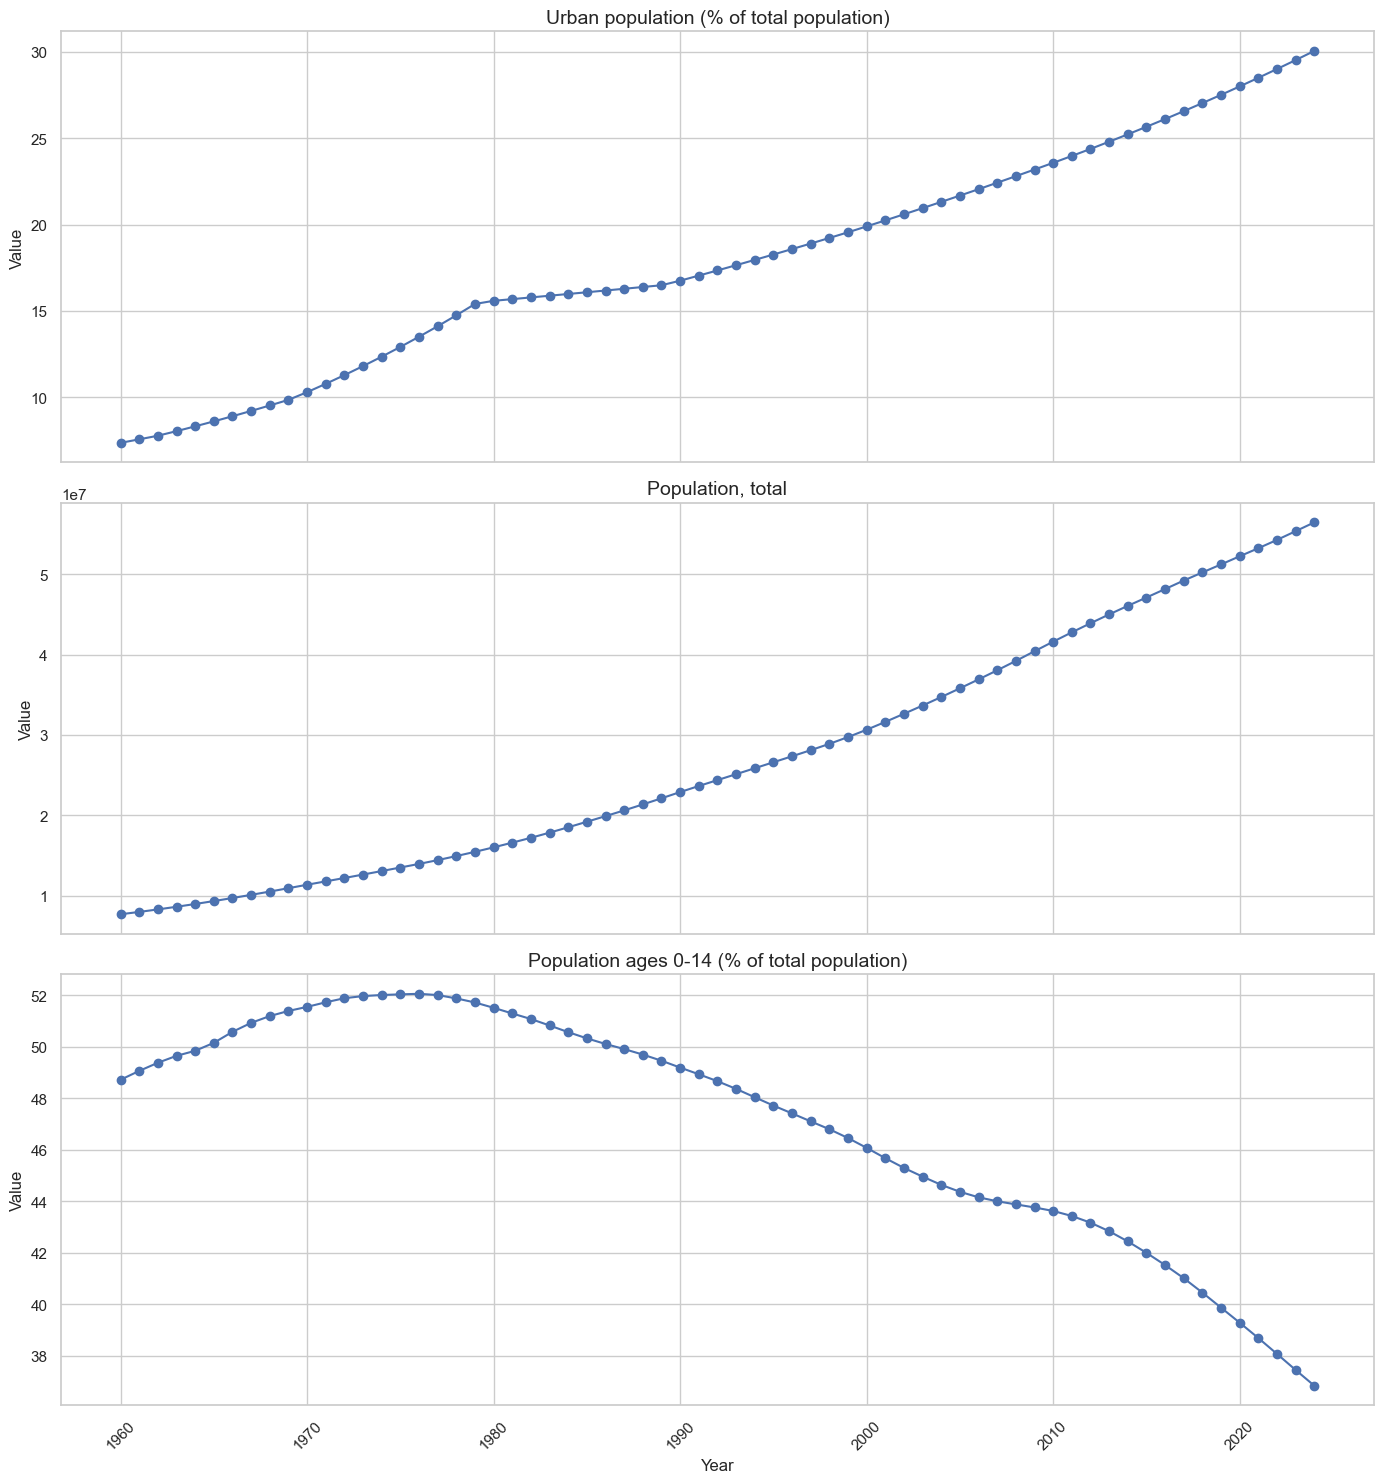

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")

# Create a figure with 3 subplots, one for each indicator
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(14, 15), sharex=True)

# List of indicators
indicators = dashboard_df['Indicator Name'].unique()

# Plot each indicator in its subplot
for i, indicator in enumerate(indicators):
    data = dashboard_df[dashboard_df['Indicator Name'] == indicator]
    axes[i].plot(data['Year'], data['Value'], marker='o')
    axes[i].set_title(indicator, fontsize=14)
    axes[i].set_ylabel('Value')
    axes[i].tick_params(axis='x', rotation=45)

# Set common x-label
axes[-1].set_xlabel('Year')

plt.tight_layout()
plt.show()

In [45]:
# Melt the dataframe
clean_df = df.melt(
    id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'],
    var_name='Year',
    value_name='Value'
)

# Convert Year to numeric
clean_df['Year'] = clean_df['Year'].astype(int)

# Preview the cleaned data
clean_df.head(10)

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Value
0,Kenya,KEN,"Intentional homicides (per 100,000 people)",VC.IHR.PSRC.P5,1960,NaN
1,Kenya,KEN,"Internally displaced persons, new displacement...",VC.IDP.NWCV,1960,NaN
2,Kenya,KEN,"Voice and Accountability: Percentile Rank, Low...",VA.PER.RNK.LOWER,1960,NaN
3,Kenya,KEN,Travel services (% of commercial service exports),TX.VAL.TRVL.ZS.WT,1960,NaN
4,Kenya,KEN,Commercial service exports (current US$),TX.VAL.SERV.CD.WT,1960,NaN
5,Kenya,KEN,Merchandise exports by the reporting economy (...,TX.VAL.MRCH.WL.CD,1960,9.860000e+07
6,Kenya,KEN,Merchandise exports to low- and middle-income ...,TX.VAL.MRCH.R4.ZS,1960,8.113590e-01
7,Kenya,KEN,Merchandise exports to low- and middle-income ...,TX.VAL.MRCH.OR.ZS,1960,7.099391e+00
8,Kenya,KEN,Ores and metals exports (% of merchandise expo...,TX.VAL.MMTL.ZS.UN,1960,NaN
9,Kenya,KEN,Fuel exports (% of merchandise exports),TX.VAL.FUEL.ZS.UN,1960,NaN


In [46]:
# Export the cleaned dataframe to a new CSV
clean_df.to_csv("Kenya_population_cleaned.csv", index=False)

print("Data exported successfully!")

Data exported successfully!
